In [1]:
#For reading data pandas_datareader will be used
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,6,15)

In [4]:
#Read Stock price of Tesla, Ford, General Motors from Yahoo and storing into variable for use
tesla = web.DataReader("TSLA",'yahoo',start,end)
ford = web.DataReader("F",'yahoo',start,end)
gm = web.DataReader("GM",'yahoo',start,end)

In [6]:
#Converting data into CSV and storing them
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv')

In [7]:
#First 5 rows of stock 
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995
2017-01-09,231.919998,228.000000,228.970001,231.279999,3979500,231.279999


In [8]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.433165
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.913801
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.582328
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.574041
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.466311


In [9]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,35.570000,34.840000,34.980000,35.150002,10904900.0,30.431576
2017-01-04,37.240002,35.470001,35.599998,37.090000,23388500.0,32.111160
2017-01-05,37.049999,36.070000,37.009998,36.389999,15636700.0,31.505117
2017-01-06,36.549999,35.930000,36.410000,35.990002,13240100.0,31.158810
2017-01-09,36.529999,35.860001,36.119999,36.009998,15204500.0,31.176125


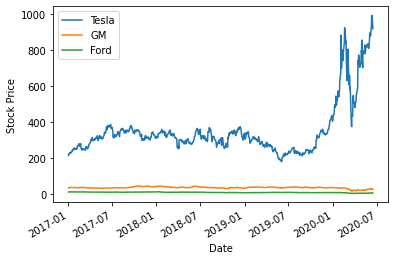

In [14]:
#Stock Open Price Visulization
tesla['Open'].plot(label='Tesla')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.ylabel('Stock Price')
plt.legend()

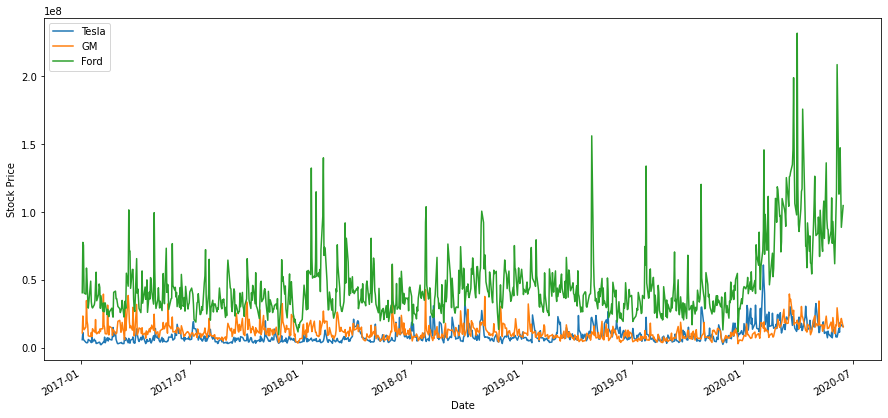

In [17]:
#Stock Volume Visulization
tesla['Volume'].plot(label='Tesla',figsize=(15,7))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.ylabel('Stock Price')
plt.legend()

In [20]:
#Total amount of Tesla stock trading on the basis of Open price
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005,1.272680e+09
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005,2.408099e+09
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000,1.338527e+09
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995,1.254446e+09
2017-01-09,231.919998,228.000000,228.970001,231.279999,3979500,231.279999,9.111861e+08


In [21]:
#Total amount of Ford stock trading on the basis of Open price
ford['Total Traded'] = ford['Open'] * ford['Volume']
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.433165,4.942318e+08
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.913801,9.914386e+08
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.582328,9.990512e+08
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.574041,5.160435e+08
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.466311,5.044171e+08


In [22]:
#Total amount of GM stock trading on the basis of Open price
gm['Total Traded'] = gm['Open'] * gm['Volume']
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2017-01-03,35.570000,34.840000,34.980000,35.150002,10904900.0,30.431576,3.814534e+08
2017-01-04,37.240002,35.470001,35.599998,37.090000,23388500.0,32.111160,8.326306e+08
2017-01-05,37.049999,36.070000,37.009998,36.389999,15636700.0,31.505117,5.787142e+08
2017-01-06,36.549999,35.930000,36.410000,35.990002,13240100.0,31.158810,4.820720e+08
2017-01-09,36.529999,35.860001,36.119999,36.009998,15204500.0,31.176125,5.491865e+08


Text(0, 0.5, 'Total Traded')

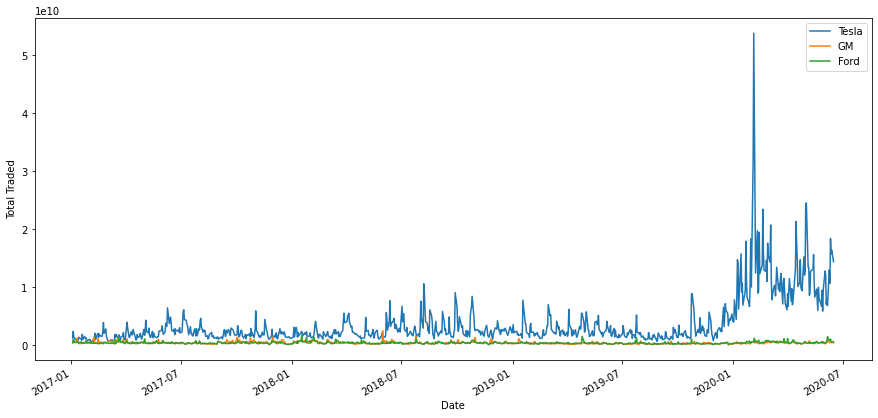

In [27]:
tesla['Total Traded'].plot(label= 'Tesla',figsize=(15,7))
gm['Total Traded'].plot(label= 'GM',figsize=(15,7))
ford['Total Traded'].plot(label= 'Ford',figsize=(15,7))
plt.legend()
plt.ylabel('Total Traded')

In [28]:
tesla['Total Traded'].argmax()

776

In [29]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-02-04,968.98999,833.880005,882.960022,887.059998,60938800,887.059998,5.380652e+10


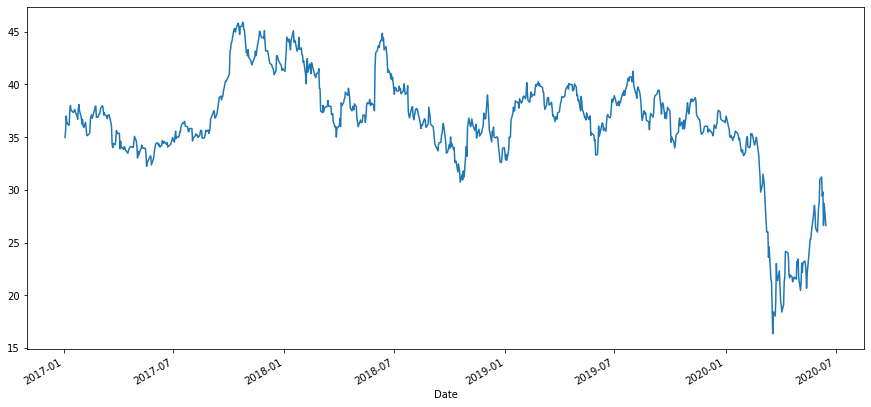

In [30]:
gm['Open'].plot(figsize=(15,7))

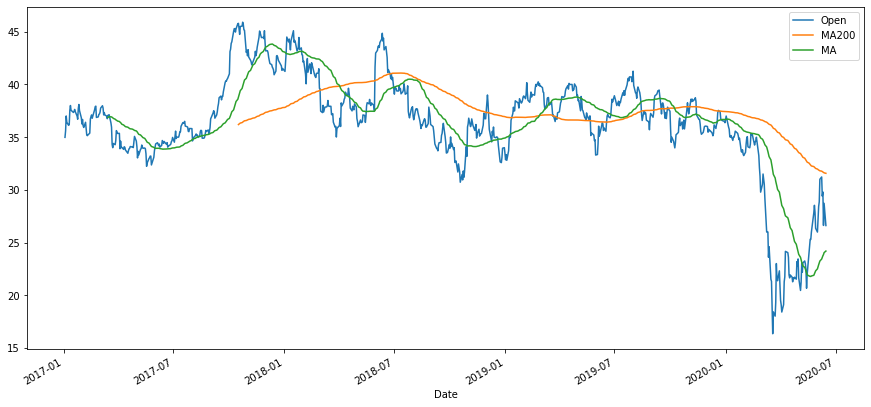

In [37]:

gm['Open'].plot(figsize = (15,7))
gm['MA']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm['MA200'].plot(label = 'MA200')
gm['MA'].plot(label = 'MA')
plt.legend()

In [38]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [42]:
#Concate Open Price and visulize
car_companies = pd.concat([tesla['Open'],gm['Open'],ford['Open']], axis=1)
car_companies.columns=['Tesla Open','GM Open','Ford Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9fa0ac9b0>,
      dtype=object)

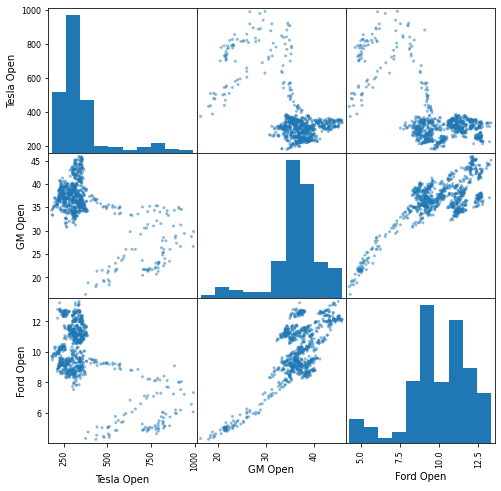

In [43]:
#Plot Scatter matrix
scatter_matrix(car_companies, figsize=(8,8))

In [49]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip



     \ 634kB 2.6MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=23ab7f741a8efb62343f8ff9c38672abf3934f6a273ad187a77dda091d859dfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-_duamqhi/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [52]:
from mpl_finance import candlestick_ohlc

In [56]:
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator,date2num

([<matplotlib.lines.Line2D at 0x7fa9f69439b0>,
  <matplotlib.patches.Rectangle at 0x7fa9f68cd5c0>])

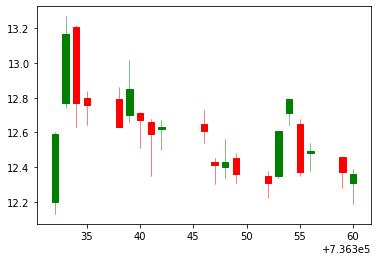

In [71]:
#Plot CandleStick
ford_reset = ford.loc['2017-01' : '2017-01'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')
fig,ax =plt.subplots()
candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')